In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyser import *

plt.style.use('ggplot')

In [2]:
#subs = generate_submissions(users=4, pbls=100)
subs = import_submissions(course_id = "C00198", dbname="test1")
bm = bianary_mat(subs)

In [6]:
from itertools import product

def succes_mat(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0.0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        ACs = subs[(subs.user_id == u) & (subs.problem_id == p) & 
                           (subs.veredict == "AC")].submission_uid.count()
        TOT = subs[(subs.user_id == u) & (subs.problem_id == p)].submission_uid.count()
        if TOT:
            table[u][p] = float(ACs) / TOT
        else:
            table[u][p] = 0

    return table


In [7]:
bm = bianary_mat(subs)
#bm

In [8]:
sm = succes_mat(subs)
#sm


In [19]:
sm.to_csv("c00198_ratio.csv")

In [23]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Diff_M1_0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities_M1_0')
normalize(Abilities)

dfAbl_M1 = pd.DataFrame(Abilities)
dfDiff_M1 = pd.DataFrame(Difficulties)

In [24]:
cnt = 8
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl_M1[Abilities.name] = Abilities
    dfDiff_M1[Difficulties.name] = Difficulties

In [25]:
#dfAbl_M1

In [26]:
#dfDiff_M1

In [27]:
# dfAbl_M1.plot()

In [28]:
# dfDiff_M1.plot()

In [29]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Diff_M2_0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities_M2_0')
normalize(Abilities)

dfAbl_M2 = pd.DataFrame(Abilities)
dfDiff_M2 = pd.DataFrame(Difficulties)

cnt = 8
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(sm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(sm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl_M2[Abilities.name] = Abilities
    dfDiff_M2[Difficulties.name] = Difficulties

In [1]:
# dfAbl_M2.plot()

NameError: name 'dfAbl_M2' is not defined

In [31]:
# dfDiff_M2.plot()

In [32]:
cmp = pd.DataFrame([dfDiff_M1.Diff_M1_9, dfDiff_M2.Diff_M2_9])

<IPython.core.display.Javascript object>


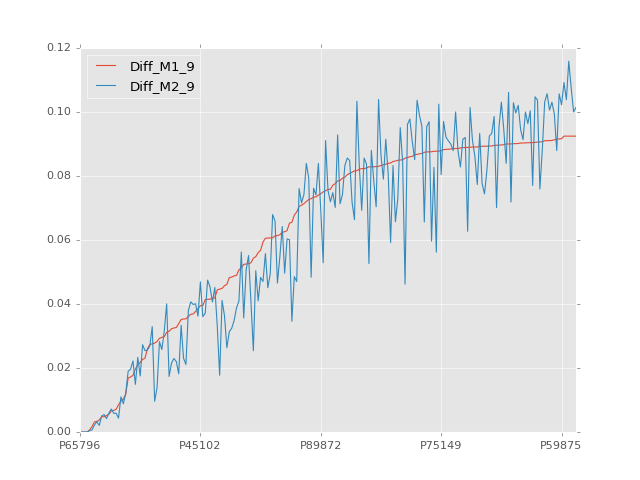

In [33]:
cmpT = cmp.T
cmpT.sort_values(['Diff_M1_9'], inplace=True)
cmpT.plot()

<IPython.core.display.Javascript object>


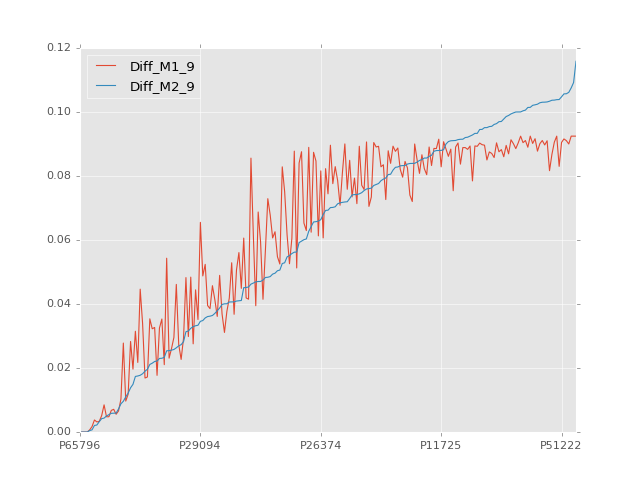

In [34]:
cmpT.sort_values(['Diff_M2_9'], inplace=True)
cmpT.plot()

<IPython.core.display.Javascript object>


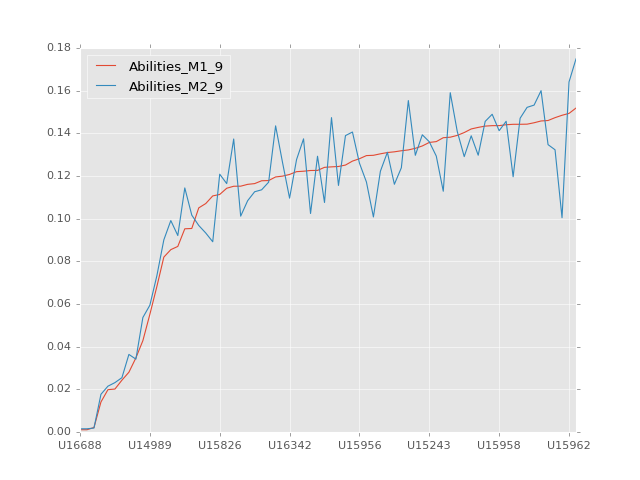

In [38]:
cmp2 = pd.DataFrame([dfAbl_M1.Abilities_M1_9, dfAbl_M2.Abilities_M2_9])
cmp2T = cmp2.T
cmp2T.sort_values(['Abilities_M1_9'], inplace=True)
cmp2T.plot()

<IPython.core.display.Javascript object>


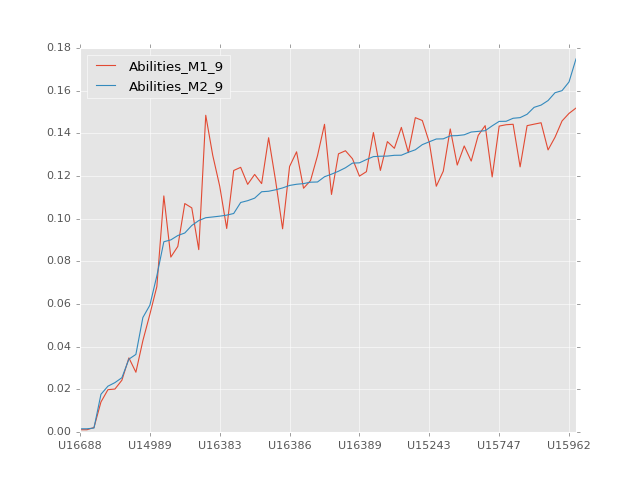

In [39]:
cmp2T.sort_values(['Abilities_M2_9'], inplace=True)
cmp2T.plot()

<IPython.core.display.Javascript object>


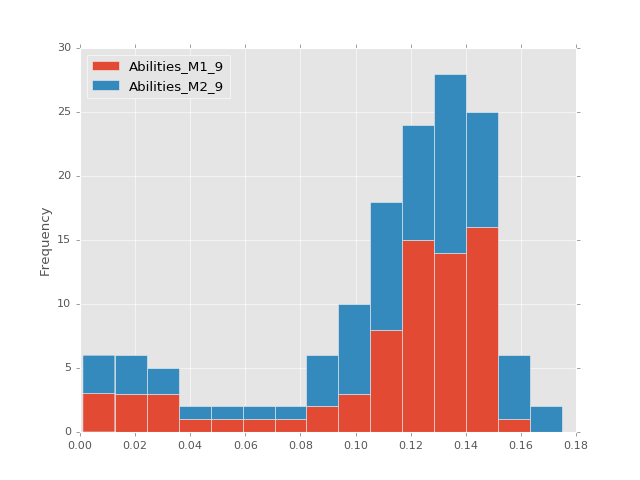

In [45]:
cmp2T.plot.hist(stacked=True,bins=15)